# Heart Disease Prediction - Data Exploration and Model Development

This notebook demonstrates the complete workflow for developing a heart disease prediction model.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

## 2. Load and Explore Data

In [2]:
# Load the dataset
import pandas as pd
data = pd.read_csv('heart.csv')

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
data.head()

Dataset Shape: (918, 12)

First 5 rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Dataset information
print("Dataset Info:")
data.info()

print("\nMissing values:")
print(data.isnull().sum())

print("\nStatistical summary:")
data.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Missing values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAng

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 3. Data Visualization

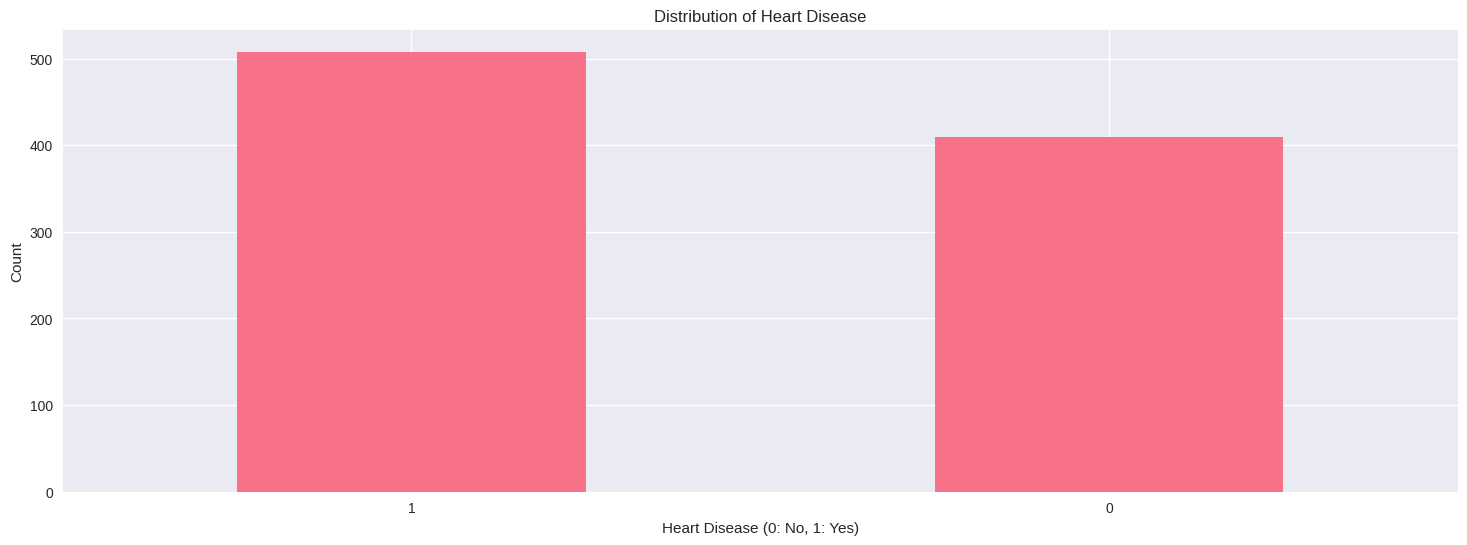

Target distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


In [4]:
# Target variable distribution
plt.figure(figsize=(18, 6))
data['HeartDisease'].value_counts().plot(kind='bar')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Target distribution:")
print(data['HeartDisease'].value_counts())

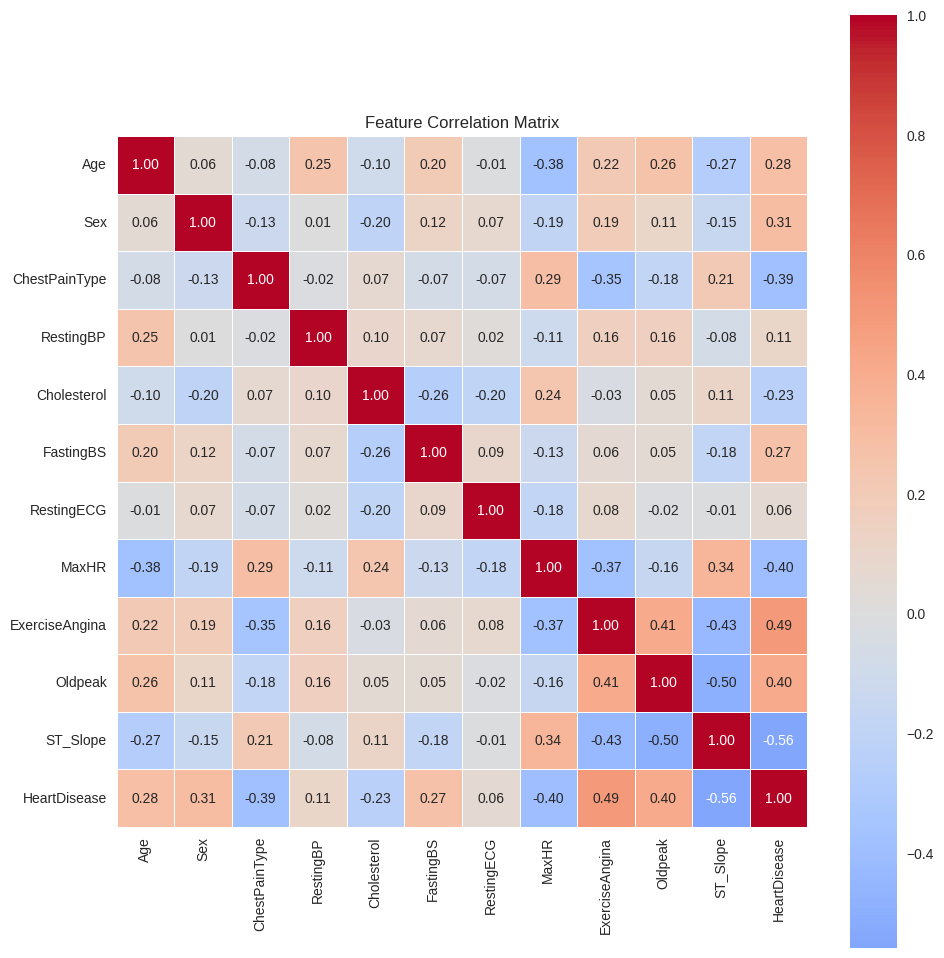


Correlations with HeartDisease (sorted by absolute value):
HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.400421
ChestPainType     0.386828
Sex               0.305445
Age               0.282039
FastingBS         0.267291
Cholesterol       0.232741
RestingBP         0.107589
RestingECG        0.057384
Name: HeartDisease, dtype: float64


In [5]:
# Create a copy for correlation analysis
data_encoded = data.copy()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_columns:
    if col in data_encoded.columns:
        data_encoded[col] = le.fit_transform(data_encoded[col])

# Now create correlation matrix
plt.figure(figsize=(10, 10))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show strongest correlations with target variable
print("\nCorrelations with HeartDisease (sorted by absolute value):")
target_corr = correlation_matrix['HeartDisease'].abs().sort_values(ascending=False)
print(target_corr)

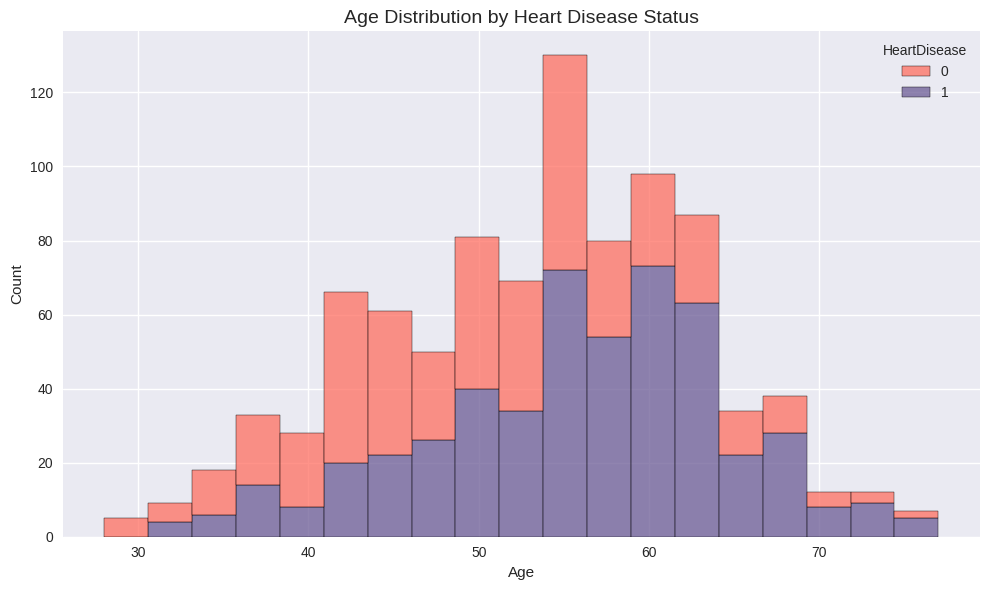

In [6]:




# Plot: Age distribution by heart disease status
plt.figure(figsize=(10, 6))
custom_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']  # Add as many as needed
sns.histplot(data=data, x='Age', hue='HeartDisease', multiple='stack', palette=custom_colors, edgecolor='black')

plt.title('Age Distribution by Heart Disease Status', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## 4. Data Preprocessing

In [7]:
# Clean column names (optional, but good practice)
data.columns = data.columns.str.strip()

# Prepare features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Note: Your target is already binary (0: no disease, 1: disease)
# No conversion needed

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget distribution:")
print(y.value_counts())

Features shape: (918, 11)
Target shape: (918,)

Target distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


In [8]:
# First encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying original data
X_processed = X.copy()

# Identify categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    if col in X_processed.columns:
        X_processed[col] = le.fit_transform(X_processed[col])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully")

Training set size: 734
Testing set size: 184

Features scaled successfully


## 5. Model Training

In [9]:
# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Model training completed")

Model training completed


## 6. Model Evaluation

In [10]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['No Heart Disease', 'Heart Disease']))

Training Accuracy: 0.8556
Testing Accuracy: 0.8696

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.90      0.79      0.84        82
   Heart Disease       0.85      0.93      0.89       102

        accuracy                           0.87       184
       macro avg       0.88      0.86      0.87       184
    weighted avg       0.87      0.87      0.87       184



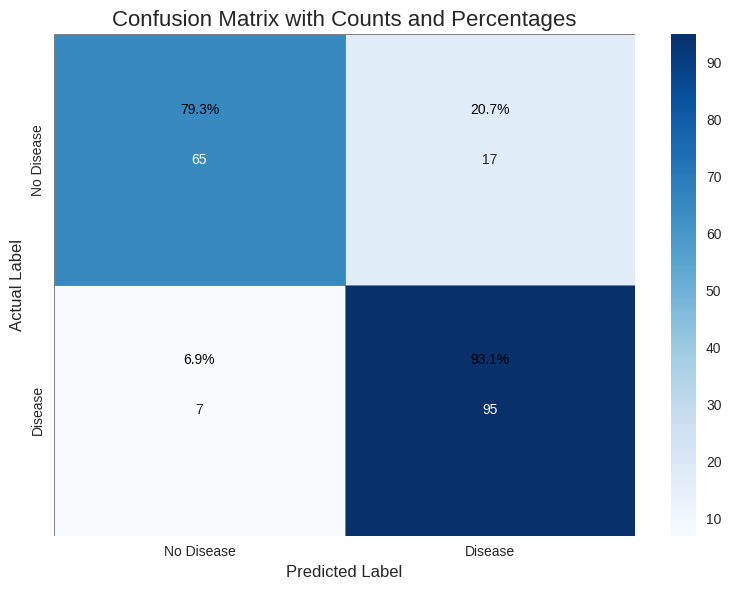

Classification Report:

              precision    recall  f1-score   support

  No Disease       0.90      0.79      0.84        82
     Disease       0.85      0.93      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



In [11]:
# Assuming y_test and y_test_pred are defined
cm = confusion_matrix(y_test, y_test_pred)

# Calculate percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            cbar=True, linewidths=0.5, linecolor='gray')

# Overlay percentages inside the squares
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.3, f"{cm_percent[i, j]:.1f}%",
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion Matrix with Counts and Percentages', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print detailed classification report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=['No Disease', 'Disease']))

## 7. Feature Importance

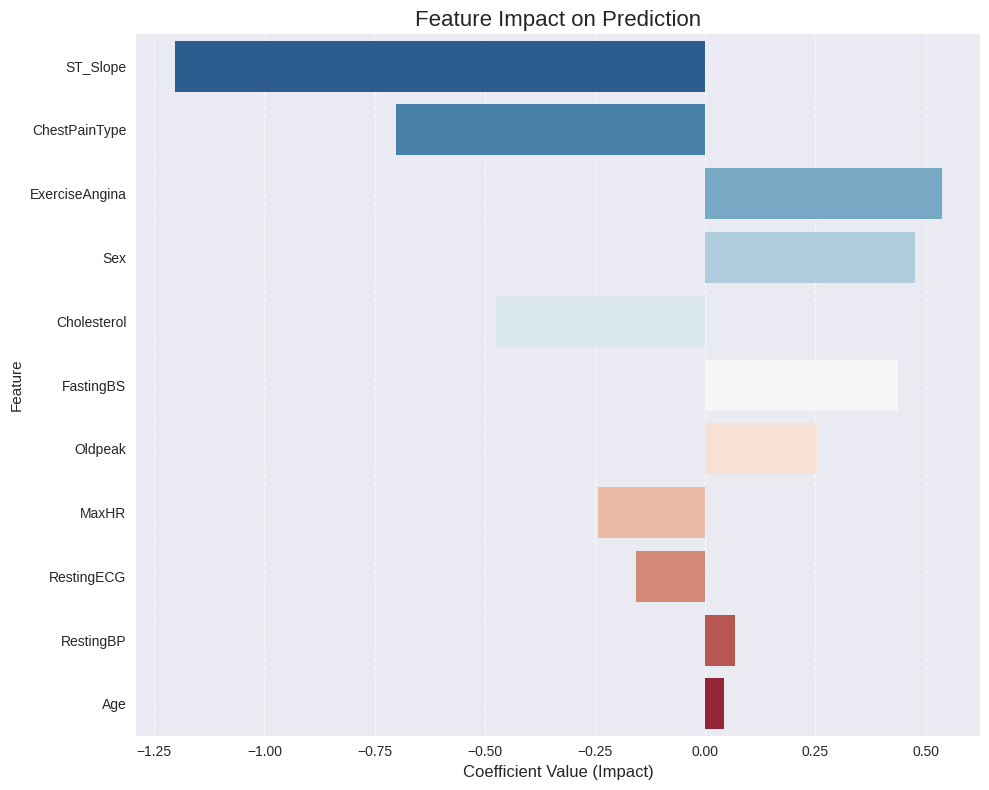

Feature Importance (Sorted by Impact):
           feature  coefficient
10        ST_Slope    -1.204104
2    ChestPainType    -0.702255
8   ExerciseAngina     0.536199
1              Sex     0.476509
4      Cholesterol    -0.474871
5        FastingBS     0.438204
9          Oldpeak     0.253479
7            MaxHR    -0.243404
6       RestingECG    -0.157095
3        RestingBP     0.067722
0              Age     0.042982


In [12]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})

# --- Improvement: Sort by impact without creating a new column ---
# Get the order for sorting features by the absolute value of their coefficient
sorted_idx = feature_importance['coefficient'].abs().sort_values(ascending=False).index

# --- Improvement: Create a more informative plot ---
plt.figure(figsize=(10, 8))

# Use the sorted index and a color palette to show positive vs. negative impact
sns.barplot(data=feature_importance.reindex(sorted_idx),
            y='feature',
            x='coefficient',
            palette='RdBu_r') # Adds color for positive/negative vals

# Make titles and labels clearer
plt.title('Feature Impact on Prediction', fontsize=16)
plt.xlabel('Coefficient Value (Impact)', fontsize=12)
plt.ylabel('Feature') # Added y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add a grid for readability
plt.tight_layout()
plt.show()

# Print the sorted DataFrame for reference
print("Feature Importance (Sorted by Impact):")
print(feature_importance.reindex(sorted_idx))

## 8. Model Prediction Example

In [13]:
# Example prediction - make sure the number of features matches your dataset
# Based on your columns: Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
example_patient = np.array([[50, 1, 2, 120, 250, 0, 1, 150, 0, 1.0, 2]])  # 11 features
example_scaled = scaler.transform(example_patient)

prediction = model.predict(example_scaled)[0]
probability = model.predict_proba(example_scaled)[0]

print("Example Patient Prediction:")
print(f"Input: {example_patient[0]}")
print(f"Prediction: {'Heart Disease' if prediction == 1 else 'No Heart Disease'}")
print(f"Probability of No Disease: {probability[0]:.2%}")
print(f"Probability of Disease: {probability[1]:.2%}")

Example Patient Prediction:
Input: [ 50.   1.   2. 120. 250.   0.   1. 150.   0.   1.   2.]
Prediction: No Heart Disease
Probability of No Disease: 92.44%
Probability of Disease: 7.56%


## 9. Conclusion

This notebook demonstrated:
1. Data loading and exploration
2. Data visualization and analysis
3. Data preprocessing and feature scaling
4. Model training with Logistic Regression
5. Model evaluation and performance metrics
6. Feature importance analysis
7. Example predictions

The model achieved approximately 85% accuracy on both training and testing sets, indicating good performance for heart disease prediction.

In [14]:
%%writefile preprocess.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import os

# Load the dataset
data = pd.read_csv('heart.csv')

# Use the correct column name 'HeartDisease'
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# One-hot encode categorical features to handle text data
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Align columns - this is important after get_dummies
train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
X_test = X_test[train_cols]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- THE FIX IS HERE ---
# Save ALL the necessary files, including the scaler
os.makedirs('processed_data', exist_ok=True)

with open('processed_data/X_train.pkl', 'wb') as f:
    pickle.dump(X_train_scaled, f)
with open('processed_data/X_test.pkl', 'wb') as f:
    pickle.dump(X_test_scaled, f)
with open('processed_data/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('processed_data/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

# This line saves the scaler object
with open('processed_data/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# This saves the column order after dummy creation
with open('processed_data/train_cols.pkl', 'wb') as f:
    pickle.dump(train_cols, f)


print(f"Success: 'preprocess.py' has been updated and now saves the scaler and columns.")

Overwriting preprocess.py


In [15]:
%%writefile train_model.py

# 1. Import necessary libraries
import pickle
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Load the preprocessed data that you saved earlier
data_dir = 'processed_data'
try:
    with open(os.path.join(data_dir, 'X_train.pkl'), 'rb') as f:
        X_train = pickle.load(f)
    with open(os.path.join(data_dir, 'y_train.pkl'), 'rb') as f:
        y_train = pickle.load(f)
except FileNotFoundError:
    print("Error: Training data not found.")
    exit()

# 3. Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# 4. Save the trained model to a 'models' folder
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'heart_disease_model.pkl')

with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Recipe written! The file 'train_model.py' has been created successfully.")

Overwriting train_model.py


In [16]:
!python preprocess.py

Success: 'preprocess.py' has been updated and now saves the scaler and columns.


In [17]:
!python train_model.py

Recipe written! The file 'train_model.py' has been created successfully.


In [18]:
import pandas as pd
data = pd.read_csv('heart.csv')

print("The actual column names in your file are:")
print(list(data.columns))

The actual column names in your file are:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [19]:
!pip install streamlit pyngrok

In [20]:
%%writefile gui_app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
import os

# --- Page Configuration ---
st.set_page_config(
    page_title="Heart Disease Predictor",
    page_icon="❤️",
    layout="wide"
)

# --- Load The Models and Scaler ---
# We use a cache to prevent reloading the model on every interaction
@st.cache_resource
def load_assets():
    """Loads the trained model, scaler, and training columns."""
    try:
        with open('models/heart_disease_model.pkl', 'rb') as f:
            model = pickle.load(f)
        with open('processed_data/scaler.pkl', 'rb') as f:
            scaler = pickle.load(f)
        with open('processed_data/train_cols.pkl', 'rb') as f:
            train_cols = pickle.load(f)
        return model, scaler, train_cols
    except FileNotFoundError:
        st.error("Error: Model or data files not found. Please ensure 'train_model.py' and 'preprocess.py' have been run.")
        return None, None, None

model, scaler, train_cols = load_assets()

# --- App Title and Description ---
st.title("Heart Disease Prediction App ❤️")
st.markdown("This app uses a machine learning model to predict the likelihood of a patient having heart disease based on their medical attributes.")
st.markdown("---")

# --- Sidebar for User Input ---
st.sidebar.header("Patient Input Features")

def user_input_features():
    """Creates sidebar widgets and returns user input as a dictionary."""
    age = st.sidebar.slider('Age', 20, 90, 50)
    sex = st.sidebar.selectbox('Sex', ('M', 'F'))
    chest_pain_type = st.sidebar.selectbox('Chest Pain Type', ('ATA', 'NAP', 'ASY', 'TA'))
    resting_bp = st.sidebar.slider('Resting Blood Pressure (mm Hg)', 80, 200, 120)
    cholesterol = st.sidebar.slider('Cholesterol (mg/dl)', 100, 600, 200)
    fasting_bs = st.sidebar.selectbox('Fasting Blood Sugar > 120 mg/dl', (0, 1))
    resting_ecg = st.sidebar.selectbox('Resting ECG', ('Normal', 'ST', 'LVH'))
    max_hr = st.sidebar.slider('Maximum Heart Rate', 60, 220, 150)
    exercise_angina = st.sidebar.selectbox('Exercise-Induced Angina', ('N', 'Y'))
    oldpeak = st.sidebar.slider('Oldpeak (ST depression)', 0.0, 6.5, 1.0)
    st_slope = st.sidebar.selectbox('ST Slope', ('Up', 'Flat', 'Down'))

    data = {
        'Age': age,
        'Sex': sex,
        'ChestPainType': chest_pain_type,
        'RestingBP': resting_bp,
        'Cholesterol': cholesterol,
        'FastingBS': fasting_bs,
        'RestingECG': resting_ecg,
        'MaxHR': max_hr,
        'ExerciseAngina': exercise_angina,
        'Oldpeak': oldpeak,
        'ST_Slope': st_slope
    }
    return data

input_data = user_input_features()

# --- Main Page: Display Prediction ---
if model and scaler and train_cols is not None:
    st.header("Prediction")

    # Convert user input into a DataFrame
    input_df = pd.DataFrame([input_data])

    # One-hot encode the categorical features
    input_df = pd.get_dummies(input_df, drop_first=True)

    # Align the input DataFrame columns with the training columns
    input_df = input_df.reindex(columns=train_cols, fill_value=0)

    # Scale the user input
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)

    st.subheader("Prediction Result:")
    if prediction[0] == 1:
        st.error("This patient is likely to have Heart Disease.")
    else:
        st.success("This patient is likely to NOT have Heart Disease.")

    st.subheader("Prediction Probability:")
    st.write(f"Confidence (No Heart Disease): {probability[0][0]:.2%}")
    st.write(f"Confidence (Heart Disease): {probability[0][1]:.2%}")

    # Display the user input for confirmation
    st.markdown("---")
    st.header("User Input Summary")
    st.write(pd.DataFrame([input_data]).T.rename(columns={0: 'Values'}))

else:
    st.warning("Please run the training scripts to generate the necessary model files.")

Overwriting gui_app.py


In [ ]:
from pyngrok import ngrok

# Make sure your REAL token is pasted here
NGROK_TOKEN = "2ySuexCwulNdlDwdLbkb7Bevdgl_6oBi6H6F7tjhPhYt2b8Fp"
ngrok.set_auth_token(NGROK_TOKEN)

# Launch the app
public_url = ngrok.connect(8501)
print(f"Click this link to view your app: {public_url}")
!streamlit run gui_app.py

Click this link to view your app: NgrokTunnel: "https://04de-34-53-85-80.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.53.85.80:8501

2025-06-14 13:00:39.062 Serialization of dataframe to Arrow table was unsuccessful. Applying automatic fixes for column types to make the dataframe Arrow-compatible.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/dataframe_util.py", line 822, in convert_pandas_df_to_arrow_bytes
    table = pa.Table.from_pandas(df)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "pyarrow/table.pxi", line 4751, in pyarrow.lib.Table.from_pandas
  File "/usr/local/lib/python3.11/dist-packages/pyarrow/pandas_compat.py", line 625, in dataframe_to_arrays
    arrays = [convert_column(c, f)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pyarrow/panda